## Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

## Carregando dataset

In [2]:
resenha = pd.read_csv('Dados/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
linhas, colunas = resenha.shape
print(f'Linhas: {linhas}\nColunas: {colunas}')

Linhas: 49459
Colunas: 4


## Conhecendo os dados

#### Exemplo de texto negativo

In [4]:
print(f'Texto negativo:\n{resenha.text_pt[10]}')

Texto negativo:
Cage interpreta um bêbado e é elogiado pela crítica. Elizabeth Shue Na verdade, tem que fazer um amor com a parte mais desprezível e superestimada de estrume em Hollywood. Eu literalmente vomitei enquanto assistia a esse filme. Claro que tive gripe, mas isso não significa que este filme não tenha contribuído para o vômito no kamode. Por que Nick Cage não pode tocar em algo que ele pode realmente fazer como um ator ruim? Nick Cage, que é brilhante em um papel de mau ator. Parreira ninguém poderia fazer melhor. A busca começa por Nicks contrato com Lúcifer ou Lou Cipher de "Night Train To Terror".


#### Exemplo de texto positivo

In [5]:
print(f'Texto positivo:\n{resenha.text_pt[49002]}')

Texto positivo:
Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo

#### Contagem dos valores e substituição

In [6]:
# Quantidade de textos positivos e negativos.
resenha['sentiment'].value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

In [7]:
# Criando uma nova coluna para classificar os sentimentos em 0 e 1.
resenha['classificacao'] = resenha['sentiment'].replace(['neg', 'pos'], [0, 1])

## Word Cloud

In [8]:
%matplotlib inline

# Criando uma função para gerar nuvem de palavras para filtrar as palavras mais frequentes da classificação negativa.
def nuvem_palavras_neg(texto, coluna_texto):
    classificacao_negativa = texto.query('sentiment == "neg"')
    todas_palavras = ''.join([texto for texto in classificacao_negativa[coluna_texto]])

    word_cloud = WordCloud(width=800, height=500,
                        max_font_size=110,
                        collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10, 7))
    plt.axis('off')
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.show()

In [9]:
%matplotlib inline
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

# Criando uma função para gerar nuvem de palavras para filtrar as palavras mais frequentes da classificação positiva.
def nuvem_palavras_pos(texto, coluna_texto):
    classificacao_positiva = texto.query('sentiment == "neg"')
    todas_palavras = ''.join([texto for texto in classificacao_positiva[coluna_texto]])

    word_cloud = WordCloud(width=800, height=500,
                        max_font_size=110,
                        collocations=False).generate(todas_palavras)

    plt.figure(figsize=(10, 7))
    plt.axis('off')
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.show()

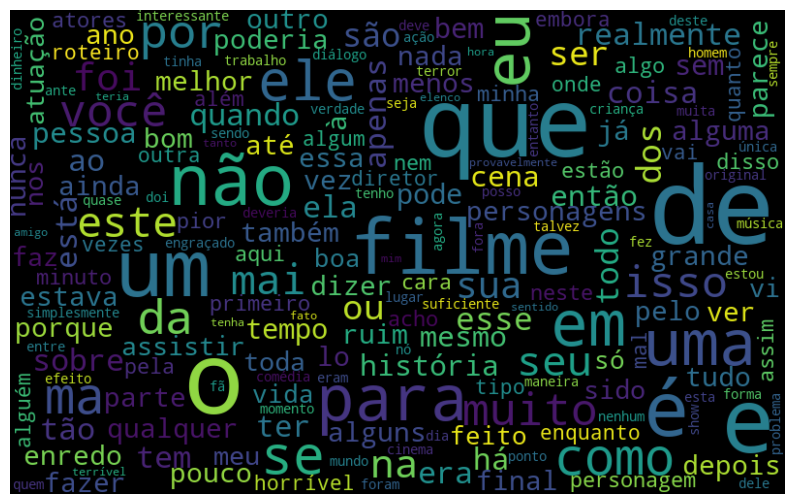

In [10]:
nuvem_palavras_neg(resenha, 'text_pt')

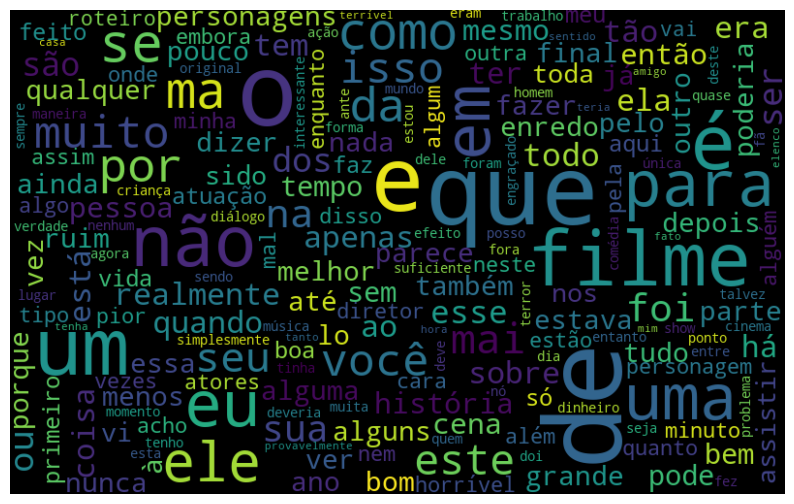

In [11]:
nuvem_palavras_pos(resenha, 'text_pt')

## Tokenização

In [12]:
# Instanciando o tokenizador para separar as palavras - separando por espaço.
tokenizador = nltk.tokenize.WhitespaceTokenizer()

# Tokenizando as palavras.
frases_tokenizadas = tokenizador.tokenize(todas_palavras)

# Calculando a frequência das palavras.
frequencia = nltk.FreqDist(frases_tokenizadas)

# Criando um dataframe para visualizar as palavras mais frequentes.
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequência": list(frequencia.values())})

# Visualizando as 10 palavras mais frequentes.
df_frequencia = df_frequencia.nlargest(columns="Frequência", n=10)

### Visualização gráfica

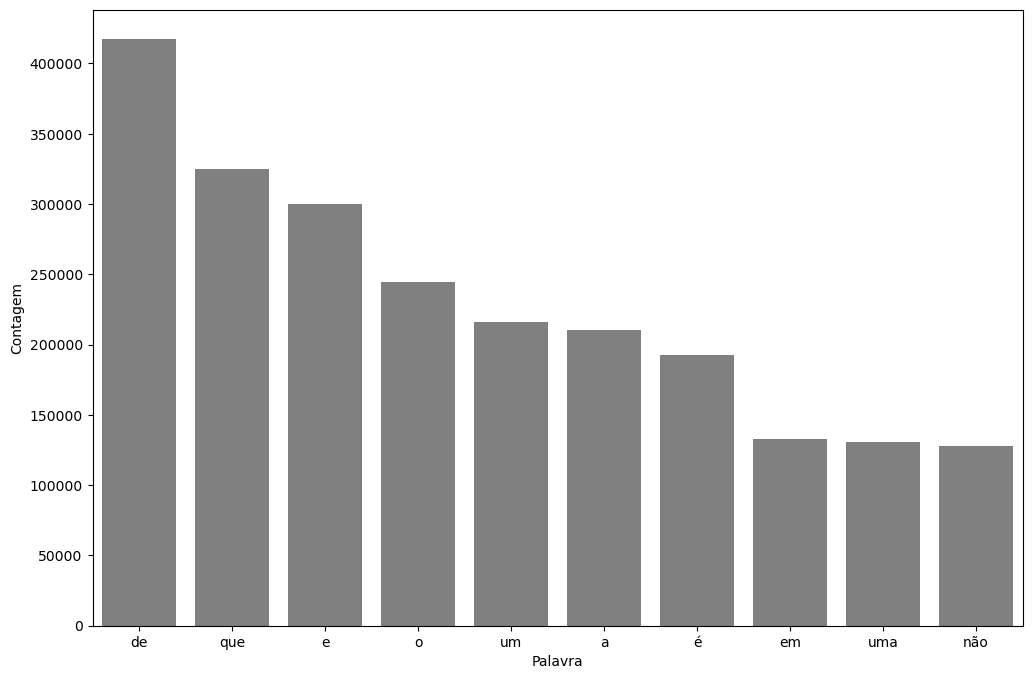

In [13]:
# Criando função para plotar o gráfico de barras com as palavras mais frequentes.
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ''.join([texto for texto in texto[coluna_texto]])
    tokenizador = nltk.tokenize.WhitespaceTokenizer()
    frases_tokenizadas = tokenizador.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(frases_tokenizadas)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                  "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns="Frequência", n=quantidade)
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequência', color='gray')
    ax.set(ylabel='Contagem')
    plt.show()

pareto(resenha, 'text_pt', 10)

## Bag of Words

In [14]:
# Instanciando o objeto que irá vetorizar os textos.
vetorizar = CountVectorizer(lowercase=False, # Não converte para minúsculo.
                            max_features=50) # Quantidade máxima de palavras.

# Vetorializando os textos da coluna text_pt.
bag_of_words = vetorizar.fit_transform(resenha['text_pt'])

# Verificando o tamanho do vetor.
print(bag_of_words.shape)

(49459, 50)


## Criando o modelo

In [15]:
# Criando uma função para vetorizar os textos, separar os dados de treino e teste e gerar o modelo de regressão logística.
def classificar_texto(texto, coluna_texto, coluna_classificacao):

    # Vetorializando os textos da coluna text_pt.
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    # Separando os dados de treino e teste.W
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state = 42)

    # Gerando o modelo de regressão logística.
    regressao_logistica = LogisticRegression(solver='lbfgs')

    # Treinando o modelo.
    regressao_logistica.fit(treino, classe_treino)

    # Retornando a acurácia do modelo.
    acuracia = regressao_logistica.score(teste, classe_teste)
    print(f'Acurácia: {round(acuracia*100, 2)}%')

In [16]:
# Chamando a função para classificar os textos.
classificar_texto(resenha, 'text_pt', 'classificacao')

Acurácia: 65.83%
